# Implementación del algoritmo K-medias

Utilizando el lenguaje de programación python realizamos un caso de agrupación con un conjunto de puntos.

## Librerias

In [24]:
# Importamos las librerias

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



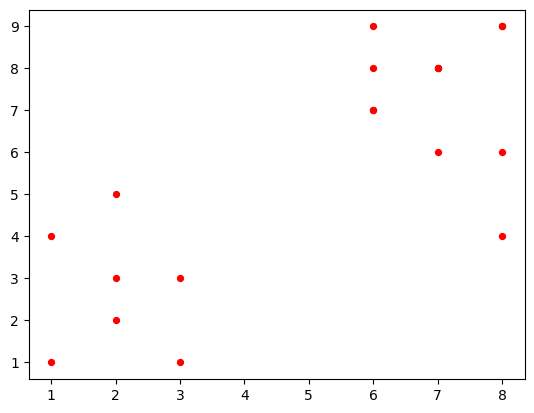

In [25]:
# Leemos y graficamos el conjunto de puntos

df=pd.read_csv("kmedias.csv")
plt.scatter(df['x'],df['y'],c='r',s=18)

## Iniciamos los centros del algoritmo de manera aleatoria

[[1. 1.]
 [7. 4.]
 [7. 1.]]


Text(0, 0.5, 'y')

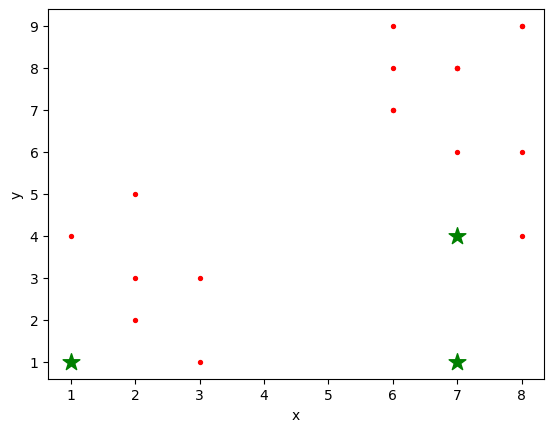

In [26]:
# Asignamos un valor para k (número de agrupaciones)
k=3

# Creamos una matriz que contenga todos los puntos
X=np.array(list(zip(df['x'],df['y'])))

# Generamos k puntos aleatorios como centroides
Cx = np.random.randint(np.min(X[:,0]), np.max(X[:,0]), size=k)
Cy = np.random.randint(np.min(X[:,1]), np.max(X[:,1]), size=k)

# Representamos los k centroides como una matriz

C=np.array(list(zip(Cx,Cy)), dtype=np.float64)
print(C)

# Graficamos los puntos originales así como también los k centroides
plt.scatter(df['x'], df['y'],c='r', s=8)
plt.scatter(Cx, Cy, marker='*', c='g', s=160)
plt.xlabel("x")
plt.ylabel("y")


## Agrupamiento de datos

In [27]:
from copy import deepcopy

# Para calcular la distancia entre dos puntos usaremos la distancia euclidiana
def distancia_euclidiana(a,b,ax=1):
  return np.linalg.norm(a-b,axis=ax)

# Creamos una matriz de 0 con las mismas dimensiones que C (los centroides)
C_prev = np.zeros(C.shape)

# Almacenamos cada punto al agrupamiento que pertenezca
clusters = np.zeros(len(X))

# C son los centroides aleatorios y C_prev son todos ceros
# Medimos la distancia entre los centroides y C_prev
diferencia_distancias = distancia_euclidiana(C, C_prev)

# El algoritmo se ejecuta hasta que no haya una diferencia
# entre las distancias de los centroides previamente y luego de la iteración
while diferencia_distancias.any() != 0:
  # Asignamos cada valor a su agrupamiento más cercano
  for i in range(len(X)):
    distancias = distancia_euclidiana(X[i], C)

    # Devuelve el indice de valores minimos entre los ejes
    cluster = np.argmin(distancias)
    clusters[i] = cluster

  # Retenemos los centroides previos
  C_prev = deepcopy(C)

# Encontramos los nuevos centroides tomando el valor promedio
  for i in range(k):
    # Tome todos los puntos en el agrupamiento i
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    if len(points) != 0:
      C[i] = np.mean(points,axis=0)
  # Encuentra la distancia entre los antiguos centroides y los nuevos centroides
  diferencia_distancias = distancia_euclidiana(C, C_prev)




## Graficamos los puntos agrupados

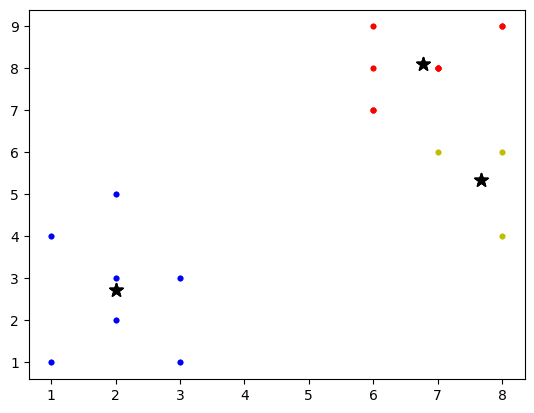

In [28]:
# Grafica los puntos
colors = ['b', 'r', 'y', 'g', 'c', 'm']
for i in range(k):
  points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
  if len(points)>0:
    plt.scatter(points[:,0], points[:,1], s=10, c=colors[i])
  else:
      # esto significa que alguno de los agrupamientos no tiene puntos
      print("Por favor, vuelva a generar los centroides")
  plt.scatter(points[:,0], points[:,1], s=10, c=colors[i])
  plt.scatter(C[:,0], C[:,1], marker='*', s=100, c='black')